In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
import math

from nnfs.datasets import spiral_data
from nnfs.datasets import vertical_data

from layer_dense import Layer_Dense
from activations import ReLU
from activations import SoftMax
from loss import Loss_CategoricalCrossEntropy

In [3]:
nnfs.init()

## A Single Neuron

In [4]:
inputs = [1,2,3,2.5]
weights = [0.2,0.8,-0.5,1.0]
bias = 2

print(inputs)
print(weights)
print(bias)

[1, 2, 3, 2.5]
[0.2, 0.8, -0.5, 1.0]
2


In [5]:
output = (inputs[0] * weights[0] +
          inputs[1] * weights[1] +
          inputs[2] * weights[2] +
          inputs[3] * weights[3] + bias)
output

4.8

## A Layer of Neurons

In [6]:
inputs = [1,2,3,2.5]

weights_1 = [0.2,0.8,-0.5,1.0]
weights_2 = [0.5,-0.91,0.26,-0.5]
weights_3 = [-0.26,-0.27,0.17,0.87]


bias_1 = 2
bias_2 = 3
bias_3 = 0.5

In [7]:
outputs = [
    # Neuron 1
    inputs[0] * weights_1[0] +
    inputs[1] * weights_1[1] +
    inputs[2] * weights_1[2] +
    inputs[3] * weights_1[3] + bias_1,
    
    # Neuron 2
    inputs[0] * weights_2[0] +
    inputs[1] * weights_2[1] +
    inputs[2] * weights_2[2] +
    inputs[3] * weights_2[3] + bias_2,
    
    # Neuron 3
    inputs[0] * weights_3[0] +
    inputs[1] * weights_3[1] +
    inputs[2] * weights_3[2] +
    inputs[3] * weights_3[3] + bias_3
]

outputs

[4.8, 1.21, 2.385]

In [8]:
inputs = [1,2,3,2.5]

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

In [9]:
layer_outputs = []

for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input * weight
    
    neuron_output += neuron_bias
    
    layer_outputs.append(neuron_output)
    
layer_outputs

[4.8, 1.21, 2.385]

## Tensors, Arrays and Vectors 

In [10]:
l = [1,5,6,2]
lol = [[1,5,6,2],
      [3,2,1,3]]
lolol = [[[1,5,6,2],
          [3,2,1,3]],
         [[5,2,1,2],
          [6,4,8,4]],
         [[2,8,5,3],
          [1,1,9,4]]]

lolol

[[[1, 5, 6, 2], [3, 2, 1, 3]],
 [[5, 2, 1, 2], [6, 4, 8, 4]],
 [[2, 8, 5, 3], [1, 1, 9, 4]]]

In [11]:
another_list_of_lists = [[4,2,3], [5,1]]

In [12]:
list_matrix_array = [[4,2], [5,1],[8,2]]

## Dot Product and Vector Addition

In [13]:
a = [1,2,3]
b = [2,3,4]

In [14]:
dot_product = a[0]*b[0] + a[1]*b[1] + a[2]*b[2]
dot_product

20

## A Single Neuron with NumPy

In [15]:
inputs = np.array([1.0, 2.0, 3.0, 2.5])
weights = np.array([0.2, 0.8, -0.5, 1.0])
bias = 2.0

outputs = np.dot(weights, inputs) + bias
outputs

4.799999952316284

## A Layer of Neurons with NumPy

In [16]:
inputs = np.array([1,2,3,2.5])

weights = np.array([[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])

In [17]:
layer_outputs = np.dot(weights, inputs) + biases
layer_outputs

array([4.79999995, 1.21000004, 2.38499999])

In [18]:
layer_outputs = np.dot(inputs, weights) + biases
layer_outputs

ValueError: shapes (4,) and (3,4) not aligned: 4 (dim 0) != 3 (dim 0)

In [ ]:
layer_outputs = np.dot(inputs, np.array(weights).T) + biases
layer_outputs

## Transposition of the Matrix Product

In [ ]:
a = [1,2,3]
b = [2,3,4]

a = np.array([a])
b = np.array([b])

print(np.dot(a,b.T))

## A Layer of Neurons & Batch of Data w/ NumPy

In [ ]:
inputs = np.array([[1.0,2.0,3.0,2.5],
          [2.0,5.0,-1.0,2.0],
          [-1.5,2.7,-0.5,-0.8]])

weights = [[0.2,0.8,-0.5,1.0],
           [0.5,-0.91,0.26,-0.5],
           [-0.26,-0.27,0.17,0.87]]

biases = [2,3,0.5]

outputs = np.dot(inputs, np.array(weights).T) + biases
outputs

# CH 3: Adding Layers

In [ ]:
inputs = np.array([[1.0,2.0,3.0,2.5],
                   [2.0,5.0,-1.0,2.0],
                   [-1.5,2.7,-0.5,-0.8]])

weights_1 = np.array([[0.2,0.8,-0.5,1.0],
                      [0.5,-0.91,0.26,-0.5],
                      [-0.26,-0.27,0.17,0.87]])

biases_1 = np.array([2,3,0.5])

In [ ]:
weights_2 = np.array([[0.1,-0.14,0.5],
                      [-0.5,0.12,-0.33],
                      [-0.44,0.73,-0.13]])

biases_2 = np.array([-1,2,-0.5])

In [ ]:
layer_1_out = np.dot(inputs, weights_1.T) + biases_1
layer_1_out

In [ ]:
layer_2_out = np.dot(layer_1_out, weights_2.T) + biases_2
layer_2_out

## Training Data

In [24]:
X,y = spiral_data(samples=100,classes=3)

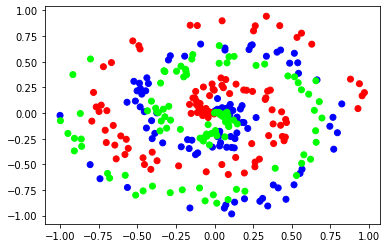

In [25]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.show()

In [26]:
y.shape

(300,)

In [27]:
X.shape

(300, 2)

## Dense Layer Class

In [31]:
dense1 = Layer_Dense(2,3)

In [32]:
dense1.forward(X)

In [33]:
dense1.output[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.64446225e-06, -6.12778786e-06, -2.99539061e-05],
       [-1.52650664e-05, -3.05420581e-05, -6.89535664e-05],
       [-1.41219862e-04, -1.18931435e-04, -1.32709392e-04],
       [-1.74765475e-04, -1.50440101e-04, -1.74291286e-04]], dtype=float32)

In [34]:
dense1.output[:5].shape

(5, 3)

In [35]:
dense1.output.shape

(300, 3)

# CH 4: Activation Functions

In [36]:
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = []

for i in inputs:
    if i > 0:
        output.append(i)
    else:
        output.append(0)

output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [37]:
output = []
for i in inputs:
    output.append(max(0,i))
output

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]

In [38]:
output = []
for i in inputs:
    output.append(np.maximum(0,i))
output

[0, 2, 0, 3.3, 0.0, 1.1, 2.2, 0]

In [39]:
activation1 = ReLU()

In [40]:
dense1.output.shape

(300, 3)

In [41]:
activation1.forward(dense1.output)

In [42]:
activation1.output.shape

(300, 3)

In [43]:
activation1.output[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [6.6444622e-06, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [44]:
layer_outputs = [4.8, 1.21, 2.385]
exp_values  = []

for output in layer_outputs:
    exp_values.append(np.e ** output)
    
print(layer_outputs)
print(exp_values)

[4.8, 1.21, 2.385]
[121.51041751873483, 3.353484652549023, 10.859062664920513]


In [56]:
norm_base = sum(exp_values)
norm_values = []
for value in exp_values:
    norm_values.append(value/norm_base)

norm_values

[0.8952826639572619, 0.02470830678209937, 0.0800090292606387]

In [57]:
sum(norm_values)

0.9999999999999999

In [58]:
exp_values = np.exp(layer_outputs)
exp_values

array([121.51041752,   3.35348465,  10.85906266])

In [59]:
norm_values = exp_values/np.sum(exp_values)
norm_values

array([0.89528266, 0.02470831, 0.08000903])

In [60]:
norm_values.sum()

0.9999999999999999

In [61]:
np.sum(exp_values).shape

()

In [62]:
softmax = SoftMax()
softmax.forward([[1,2,3]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [63]:
softmax.forward([[-2,-1,0]])
softmax.output

array([[0.09003057, 0.24472847, 0.66524096]])

In [64]:
i = [[1,2,3]]
np.max(i, axis=1, keepdims=True).shape

(1, 1)

In [65]:
np.max(i, axis=1, keepdims=False).shape

(1,)

In [66]:
X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

In [67]:
dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
print(activation2.output.shape)

[[0.33333334 0.33333334 0.33333334]
 [0.33333302 0.33333433 0.3333327 ]
 [0.33333278 0.33333498 0.33333224]
 [0.33333233 0.33333626 0.33333138]
 [0.33333236 0.3333363  0.33333138]]
(300, 3)


# CH 5: Calculating Network Error with Loss

## Categorical Cross-Entropy

In [68]:
softmax_output = [0.7,0.1,0.2]
target_output =[1.,0,0]

loss = -(math.log(softmax_output[0]) * target_output[0] +
         math.log(softmax_output[1]) * target_output[1] + 
         math.log(softmax_output[2]) * target_output[2])
loss

0.35667494393873245

In [69]:
loss = -math.log(softmax_output[0])
loss

0.35667494393873245

In [70]:
softmax_output = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([0,1,1])

In [71]:
for targ_idx, dist in zip(class_targets, softmax_output):
    print(dist[targ_idx])

0.7
0.5
0.9


In [72]:
print(softmax_output[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [73]:
print(softmax_output[range(len(softmax_output)), class_targets])

[0.7 0.5 0.9]


In [74]:
print(-np.log(softmax_output[range(len(softmax_output)), class_targets]))

[0.35667494 0.69314718 0.10536052]


In [75]:
neg_log = -np.log(softmax_output[range(len(softmax_output)), class_targets])
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [76]:
average_loss = np.mean(neg_log)
average_loss

0.38506088005216804

In [77]:
softmax_output = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

In [78]:
if len(class_targets.shape) == 1:
    correct_confidences = softmax_output[range(len(softmax_output)), class_targets]
    print(correct_confidences)
elif len(class_targets.shape) == 2:
    correct_confidences = np.sum(softmax_output*class_targets, axis=1)
    print(correct_confidences)

[0.7 0.5 0.9]


In [79]:
neg_log = -np.log(correct_confidences)
neg_log

array([0.35667494, 0.69314718, 0.10536052])

In [80]:
average_loss = np.mean(neg_log)
average_loss

0.38506088005216804

In [81]:
np.log(0)

<ipython-input-81-f6e7c0610b57>:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [82]:
-np.log(1)

-0.0

In [83]:
1e-3

0.001

In [84]:
-np.log(1 + 1e-7)

-9.999999505838704e-08

In [85]:
np.clip([0,1,0.5], 1e-7, 1 - 1e-7)

array([1.000000e-07, 9.999999e-01, 5.000000e-01])

In [86]:
criterion = Loss_CategoricalCrossEntropy()

In [87]:
loss = criterion.calculate(softmax_output, class_targets)
loss

0.38506088005216804

In [88]:
X,y = spiral_data(samples=100,classes=3)

dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:5])
print(activation2.output.shape)
print(y.shape)

loss = criterion.calculate(activation2.output, y)
loss

[[0.33333334 0.33333334 0.33333334]
 [0.3333339  0.33333302 0.33333308]
 [0.33333507 0.33333233 0.33333266]
 [0.33333388 0.33333302 0.33333308]
 [0.33333334 0.33333334 0.33333334]]
(300, 3)
(300,)


1.0986202

## Accuracy Calculation

In [89]:
softmax_output = np.array([[0.7,0.2,0.1],
                           [0.5,0.1,0.4],
                           [0.02, 0.9, 0.08]])


class_targets = np.array([[1,0,0],
                          [0,1,0],
                          [0,1,0]])

class_targets = np.array([0,1,1])
class_targets

array([0, 1, 1])

In [90]:
predictions = np.argmax(softmax_output, axis=1)
predictions

array([0, 0, 1], dtype=int64)

In [91]:
if len(class_targets.shape) == 2:
    class_targets = np.argmax(class_targets, axis=1)
class_targets

array([0, 1, 1])

In [92]:
accuracy = (predictions==class_targets)
accuracy

array([ True, False,  True])

In [93]:
accuracy = np.mean(accuracy)
accuracy

0.6666666666666666

In [94]:
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)

accuracy = np.mean(predictions==y)
accuracy

0.3333333333333333

# CH 6: Introducing Optimization


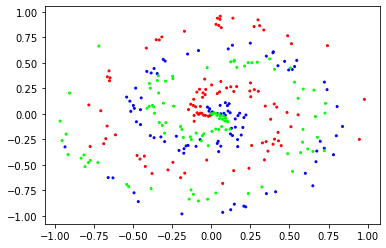

In [95]:
X, y= spiral_data(samples=100, classes=3)
plt.scatter(X[:,0],X[:,1], c=y, s=4, cmap='brg')
plt.show()

In [96]:
dense1 = Layer_Dense(2,3)
activation1 = ReLU()

dense2 = Layer_Dense(3,3)
activation2 = SoftMax()

criterion = Loss_CategoricalCrossEntropy()

In [97]:
lowest_loss = 999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [98]:
for iteration in range(10000):
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases  += 0.05 * np.random.randn(1,3)
    
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases +=  0.05 * np.random.randn(1,3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)

    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    loss = criterion.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions == y)
    
    if loss < lowest_loss:
        print("New set of weights found, iteration:", iteration, "loss:", loss, "acc:", accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()
    
    

New set of weights found, iteration: 0 loss: 1.1004393 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0994786 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0989817 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.098773 acc: 0.3333333333333333
New set of weights found, iteration: 23 loss: 1.0977988 acc: 0.3466666666666667
New set of weights found, iteration: 24 loss: 1.097438 acc: 0.3333333333333333
New set of weights found, iteration: 30 loss: 1.0968962 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0967957 acc: 0.3333333333333333
New set of weights found, iteration: 41 loss: 1.0952817 acc: 0.35
New set of weights found, iteration: 44 loss: 1.0949552 acc: 0.3933333333333333
New set of weights found, iteration: 45 loss: 1.0944085 acc: 0.41
New set of weights found, iteration: 46 loss: 1.0940518 acc: 0.32
New set of weights found, iteration: 52 loss: 1.0932709 acc: 0.35333333333333333
New se

# CH 7: Derivatives

## The Impact off a Parameter on the Output

In [99]:
def f(x):
    return 2*x

In [100]:
x = np.array(range(5))
y = f(x)

In [101]:
x

array([0, 1, 2, 3, 4])

In [102]:
y

array([0, 2, 4, 6, 8])

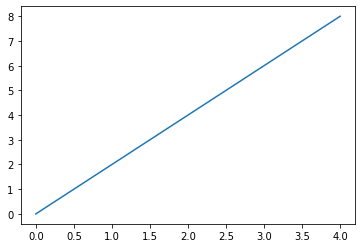

In [103]:
plt.plot(x,y)
plt.show()

## The Slope

In [104]:
# Rise over run
# i.e. change in y/ change in x

print((y[1] - y[0]) / (x[1] - x[0]))

2.0


In [105]:
def f(x):
    return 2*x**2

In [106]:
x = np.array(range(5))
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[ 0  2  8 18 32]


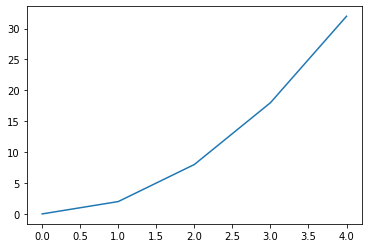

In [107]:
plt.plot(x,y)
plt.show()

In [108]:
print((y[1] - y[0]) / (x[1] - x[0]))

2.0


In [109]:
print((y[3] - y[2]) / (x[3] - x[2]))

10.0


In [110]:
# So the slope varies because of the non-linear property of f(x)

In [111]:
p2_delta = 1e-4
p2_delta

0.0001

In [112]:
x1 = 1
x2 = x1 + p2_delta

In [113]:
y1 = f(x1)
y2 = f(x2)

In [114]:
approximate_derivative = (y2-y1)/(x2-x1)
approximate_derivative

4.0001999999987845

## Numerical Derivative

In [115]:
def f(x):
    return 2*x**2

In [116]:
x = np.arange(0,5,0.001)
y = f(x)

In [117]:
x.shape

(5000,)

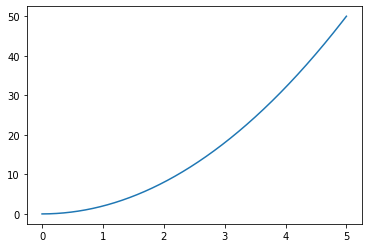

In [118]:
plt.plot(x,y)
plt.show()

In [119]:
p2_delta = 1e-4

x1 = 2
x2 = x1 + p2_delta

y1 = f(x1)
y2 = f(x2)

print((x1,y1), (x2,y2))

(2, 8) (2.0001, 8.000800020000002)


In [120]:
approximate_d = (y2-y1)/(x2-x1)
approximate_d

8.000199999998785

In [121]:
b = y2 - approximate_d*x2
b

-8.00039999999757

In [122]:
def tangent_line(x):
    return approximate_d*x+b

In [123]:
to_plot_x = [x1-0.9, x1, x1+0.9]
to_plot_x

[1.1, 2, 2.9]

In [124]:
to_plot_y = [tangent_line(i) for i in to_plot_x]
to_plot_y

[0.7998200000010929, 7.999999999999998, 15.200179999998904]

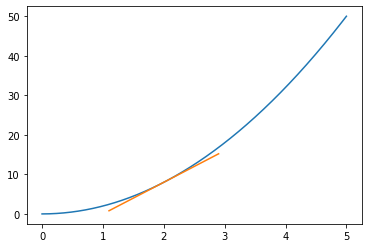

In [125]:
plt.plot(x,y)
plt.plot(to_plot_x, to_plot_y)
plt.show()

In [126]:
x = np.array(np.arange(0,5,0.001))
y = f(x)

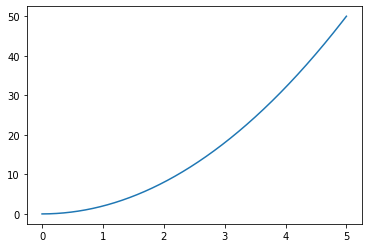

In [127]:
plt.plot(x,y)

In [128]:
colors = ['k','g','r','b','c']

In [129]:
def approximate_tangent_line(x, approximate_d):
    return (x*approximate_d) + b

In [130]:
b

-8.00039999999757

(0, 0) (0.0001, 2e-08)
Approximate derivative for f(x) where x = 0 is 0.00019999999999999998
(1, 2) (1.0001, 2.00040002)
Approximate derivative for f(x) where x = 1 is 4.0001999999987845
(2, 8) (2.0001, 8.000800020000002)
Approximate derivative for f(x) where x = 2 is 8.000199999998785
(3, 18) (3.0001, 18.001200020000002)
Approximate derivative for f(x) where x = 3 is 12.000199999998785
(4, 32) (4.0001, 32.00160002)
Approximate derivative for f(x) where x = 4 is 16.000200000016548


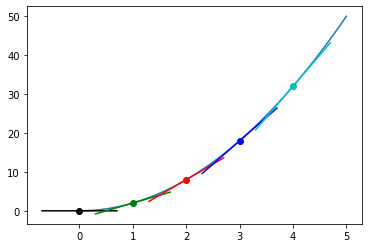

In [131]:
plt.plot(x,y)
for i in range(5):
    p2_delta = 1e-4
    
    x1 = i
    x2 = x1+p2_delta
    
    y1 = f(x1)
    y2 = f(x2)
    
    print((x1, y1), (x2,y2))
    
    approximate_d = (y2-y1)/(x2-x1)
    b = y2-(approximate_d*x2)
    
    to_plot = [x1-0.7, x1, x1+0.7]
    plt.scatter(x1, y1, c=colors[i])
    plt.plot([points for points in to_plot],
             [approximate_tangent_line(point, approximate_d) for point in to_plot],
             c=colors[i])
    
    print("Approximate derivative for f(x) where x = {} is {}".format(x1, approximate_d))
plt.show()

# CH 9: Backpropagation

In [1]:
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0

In [2]:
xw0 = x[0] * w[0]
xw0

-3.0

In [3]:
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw1, xw2)

2.0 6.0


In [4]:
z = xw0 + xw1 + xw2 + b
z

6.0

In [5]:
y = max(z,0)
y

6.0

In [6]:
# Derivative from previous layer
dvalue = 1.0

In [7]:
# Derivative of ReLU and the chain rule
# Based on z = 6 (an input to ReLU)
drelu_dz = dvalue * (1. if z > 0 else 0.) # D of Relu is either 1 or 0, 1 when input is > 0 since D of x is 1, 0 if input is < than 0 since D of constant is 0
drelu_dz

1.0

In [8]:
# Partial/Derivative of sum i.e. f(x,y,z) = x + y + z is always 1, if x*w is treated as an input to sum then its partial derivative is obviously 1
dsum_dxw0 = 1
drelu_dxw0 = drelu_dz * dsum_dxw0 # Applying chain rule
drelu_dxw0

1.0

In [9]:
dsum_dxw1 = 1
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw1

1.0

In [10]:
dsum_dxw2 = 1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_dxw2

1.0

In [11]:
dsum_db = 1
drelu_db = drelu_dz * dsum_db
drelu_db

1.0

In [12]:
# For a function f(x,y) = x*y the partial derivative of f(x,y) with respect to x is y, with respect to y its x
# Therefore the partial derivative of a function that multiplies input by weight with respect to input is the wight itself
# and for weight its the input

dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0 # Chain Rule i.e. derivative of subsequent function, the summation
drelu_dx0

-3.0

In [13]:
dmul_dx1 = w[1]
dmul_dx2 = w[2]

dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]

In [14]:
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dx2 = drelu_dxw2 * dmul_dx2

drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dw2 = drelu_dxw2 * dmul_dw2

In [15]:
print(drelu_dx0, drelu_dx1, drelu_dx2)

-3.0 -1.0 2.0


In [16]:
print(drelu_dw0, drelu_dw1, drelu_dw2)

1.0 -2.0 3.0


In [17]:
# The computed partial derivates when combined make up the gradient vector
dx = [drelu_dx0, drelu_dx1, drelu_dx2]
dw = [drelu_dw0, drelu_dw1, drelu_dw2]
db = drelu_db

In [18]:
dx

[-3.0, -1.0, 2.0]

In [19]:
dw

[1.0, -2.0, 3.0]

In [20]:
db

1.0

In [21]:
print(w,b)

[-3.0, -1.0, 2.0] 1.0


In [22]:
f_w = -0.001

In [23]:
print(dw[0]*f_w, dw[1]*f_w, dw[2]*f_w)

-0.001 0.002 -0.003


In [24]:
# Naive weight update where weights are updated by decreasing them by the small fraction of their derivatives
w[0] += f_w * dw[0]
w[1] += f_w * dw[1]
w[2] += f_w * dw[2]
b += f_w * db
print(w,b)

[-3.001, -0.998, 1.997] 0.999


In [25]:
y # Before update

6.0

In [26]:
# Another forward pass with updated weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z  = xw0 + xw1 + xw2 + b
y = max(z, 0)
y # After update, as can be seen the output is now lower than before, thus the output of the function has been nicely decreased, just what we want to achieve with a loss function

5.985

In [30]:
# Backpropagation with multi-neuron i.e. layer
dvalues = np.array([[1.,1.,1.]])
dvalues

array([[1., 1., 1.]])

In [31]:
weights = np.array([[0.2,0.8,-0.5,1],
                    [0.5,-0.91,0.26,-0.5],
                    [-.26, -.27, .17, .87]]).T
weights

array([[ 0.2 ,  0.5 , -0.26],
       [ 0.8 , -0.91, -0.27],
       [-0.5 ,  0.26,  0.17],
       [ 1.  , -0.5 ,  0.87]])

In [32]:
# Sum weights related to the given input 
# multiplied by the gradient related to the given neuron
dx0 = sum([weights[0,0] * dvalues[0,0], weights[0,1] * dvalues[0,1], weights[0,2] * dvalues[0,2]])
dx0

0.43999999999999995

In [33]:
dx1 = sum([weights[1,0] * dvalues[0,0], weights[1,1] * dvalues[0,1], weights[1,2] * dvalues[0,2]])
dx1

-0.38

In [34]:
dx2 = sum([weights[2,0] * dvalues[0,0], weights[2,1] * dvalues[0,1], weights[2,2] * dvalues[0,2]])
dx2

-0.06999999999999998

In [35]:
dx3 = sum([weights[3,0] * dvalues[0,0], weights[3,1] * dvalues[0,1], weights[3,2] * dvalues[0,2]])
dx3

1.37

In [36]:
dinputs = np.array([dx0,dx1,dx2,dx3])
dinputs

array([ 0.44, -0.38, -0.07,  1.37])

In [37]:
# Same result, simpler way, just using dot product
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs.shape)
print(dinputs)

(4,)
[ 0.44 -0.38 -0.07  1.37]


In [38]:
# Batch of data instead of a single dvalues for single sample
dvalues = np.array([[1.,1.,1.],
                    [2.,2.,2.],
                    [3.,3.,3.]])
dvalues.shape

(3, 3)

In [39]:
weights.shape

(4, 3)

In [40]:
dinputs = np.dot(dvalues, weights.T)
print(dinputs.shape)
print(dinputs)

(3, 4)
[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


In [41]:
inputs = np.array([[1,2,3,2.5],
                   [2.,5.,-1.,2],
                   [-1.5,2.7,3.3,-0.8]])
print(inputs.shape)
print(inputs)

(3, 4)
[[ 1.   2.   3.   2.5]
 [ 2.   5.  -1.   2. ]
 [-1.5  2.7  3.3 -0.8]]


In [42]:
inputs.T

array([[ 1. ,  2. , -1.5],
       [ 2. ,  5. ,  2.7],
       [ 3. , -1. ,  3.3],
       [ 2.5,  2. , -0.8]])

In [43]:
dvalues

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [44]:
print(weights.shape)
print(weights)

(4, 3)
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]


In [45]:
dweights = np.dot(inputs.T, dvalues)
print(dweights.shape)
print(dweights)

(4, 3)
[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


In [46]:
biases = np.array([[2,3,0.5]])
biases.shape

(1, 3)

In [47]:
dbiases = np.sum(dvalues, axis=0, keepdims=True)
dbiases

array([[6., 6., 6.]])

In [48]:
# ReLU derivative
# Example layer output
z = np.array([[1,2,-3,-4],
              [2,-7,-1,3],
              [-1,2,5,-1]])

z.shape

(3, 4)

In [49]:
z

array([[ 1,  2, -3, -4],
       [ 2, -7, -1,  3],
       [-1,  2,  5, -1]])

In [50]:
dvalues = np.array([[1,2,3,4],
                    [5,6,7,8],
                    [9,10,11,11]])
dvalues.shape

(3, 4)

In [51]:
drelu = np.zeros_like(z)
drelu

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [52]:
drelu[z > 0] = 1
drelu

array([[1, 1, 0, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 0]])

In [53]:
drelu = drelu*dvalues
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

In [54]:
drelu = dvalues.copy()
drelu

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 11]])

In [55]:
drelu[z <= 0] = 0
drelu

array([[ 1,  2,  0,  0],
       [ 5,  0,  0,  8],
       [ 0, 10, 11,  0]])

In [56]:
weights

array([[ 0.2 ,  0.5 , -0.26],
       [ 0.8 , -0.91, -0.27],
       [-0.5 ,  0.26,  0.17],
       [ 1.  , -0.5 ,  0.87]])

## Combining forward and backward pass of a single neuron with a fully connected layer and batch based derivative

In [58]:
# Passed-in gradient from the next layer 
dvalues = np.array([[1.,1.,1.],
                    [2.,2.,2.],
                    [3.,3.,3.]])

dvalues.shape

(3, 3)

In [59]:
# 3 sets of inputs (samples) with 4 features
inputs = np.array([[1,2,3,2.5],
                   [2.,5.,-1.,2.],
                   [-1.5,2.7,3.3,-0.8]])
inputs.shape

(3, 4)

In [69]:
# 3 sets of weights i.e. 3 neurons
# Each neuron connects to 4 features of an input
weights = np.array([[0.2,0.8,-0.5,1],
                    [0.5,-0.91,0.26,-0.5],
                    [-0.26,-0.27,0.17,0.87]]).T
print(weights.shape)
print(weights)

(4, 3)
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]


In [61]:
# 3 biases, one per neuron
biases = np.array([[2,3,0.5]])
biases.shape

(1, 3)

In [68]:
# Forward pass
layer_outputs = np.dot(inputs, weights) + biases
print(layer_outputs.shape)
print(layer_outputs)

(3, 3)
[[ 4.79999995  1.21000004  2.38499999]
 [ 8.9000001  -1.80999994  0.19999999]
 [ 1.41000003  1.051       0.02599999]]


In [70]:
relu_outputs = np.maximum(0, layer_outputs)
relu_outputs

array([[4.79999995, 1.21000004, 2.38499999],
       [8.9000001 , 0.        , 0.19999999],
       [1.41000003, 1.051     , 0.02599999]])

In [71]:
# Backpropagation
# ReLU activation - sumlates derivative with respect to inpuit values from next layer passed to the current layer during backprop
drelu = relu_outputs.copy()
drelu[layer_outputs <= 0] = 0
print(drelu.shape)
print(drelu)

(3, 3)
[[4.79999995 1.21000004 2.38499999]
 [8.9000001  0.         0.19999999]
 [1.41000003 1.051      0.02599999]]


In [72]:
# Derivative with respect to inputs + chain rule
dinputs = np.dot(drelu, weights.T)
dinputs.shape

(3, 4)

In [73]:
# Derivative with respect to weights + chain rule
dweights = np.dot(inputs.T, drelu)
print(dweights.shape)

(4, 3)


In [74]:
# Derivative with respect to biases, since it's a sum it will always be one so chain rule * by drelu won't change drelu, thus just sum along axis to account for batch
dbiases = np.sum(drelu, axis=0, keepdims=True)
dbiases.shape

(1, 3)

In [75]:
# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases

In [76]:
weights

array([[ 0.179515 ,  0.5003665, -0.262746 ],
       [ 0.742093 , -0.9152577, -0.2758402],
       [-0.510153 ,  0.2529017,  0.1629592],
       [ 0.971328 , -0.5021842,  0.8636583]])

In [77]:
biases

array([[1.98489 , 2.997739, 0.497389]])

In [79]:
eye_example = np.eye(5)
eye_example

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [81]:
sparse_labels = np.array([4,2,1,0,3])
sparse_labels.shape

(5,)

In [83]:
eye_example[sparse_labels] # Rearrange with respect yo y_true discrete labels

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [4]:
# Softmax Activation derivative

# Single Sample
softmax_output = np.array([0.7,0.1,0.2]).reshape(-1,1)
softmax_output

array([[0.7],
       [0.1],
       [0.2]])

In [5]:
print(softmax_output * np.eye(softmax_output.shape[0]))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


In [6]:
print(np.diagflat(softmax_output))

[[0.7 0.  0. ]
 [0.  0.1 0. ]
 [0.  0.  0.2]]


In [7]:
print(np.dot(softmax_output, softmax_output.T))

[[0.49 0.07 0.14]
 [0.07 0.01 0.02]
 [0.14 0.02 0.04]]


In [9]:
# Jacobian Matrix
print(np.diagflat(softmax_output) - np.dot(softmax_output, softmax_output.T))

[[ 0.20999999 -0.07       -0.14      ]
 [-0.07        0.09       -0.02      ]
 [-0.14       -0.02        0.16      ]]


In [12]:
# Test SoftMax and Sotftmax + CC
from loss import Activation_Softmax_Loss_CategoricalCrossentropy, Loss_CategoricalCrossEntropy
from activations import SoftMax

softmax_outputs = np.array([[0.7,0.1,0.2],
                           [0.1,0.5,0.4],
                           [0.02,0.9,0.08]])

class_targets = np.array([0,1,1])

In [11]:
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs

In [13]:
activation = SoftMax()
activation.output = softmax_outputs

loss = Loss_CategoricalCrossEntropy()
loss.backward(softmax_outputs, class_targets)
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs

In [14]:
print("Gradients: combined loss and activation:")
print(dvalues1)

Gradients: combined loss and activation:
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


In [15]:
print("Gradinets: separate loss and activation:")
print(dvalues2)

Gradinets: separate loss and activation:
[[-0.09999999  0.03333334  0.06666667]
 [ 0.03333334 -0.16666667  0.13333334]
 [ 0.00666667 -0.03333333  0.02666667]]


In [16]:
from timeit import timeit

def f1():
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs
    
def f2():
    activation = SoftMax()
    activation.output = softmax_outputs

    loss = Loss_CategoricalCrossEntropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs

In [17]:
t1 = timeit(lambda: f1(), number=10000)
t2 = timeit(lambda: f2(), number=10000)
print(t1)
print(t2)

0.09716529998695478
0.5377474999986589


In [18]:
t2/t1

5.53435743079943